In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("csv-excel-files/region_wise_sales.xlsx")

In [5]:
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [8]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [19]:
df_APAC  = df[df.Region == "APAC"]
df_Europe  = df[df.Region == "Europe"]
df_Americas = df[df.Region == "Americas"]
df_APAC

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956
5,June,2022,APAC,38143
6,July,2022,APAC,29132
7,August,2022,APAC,21961
8,September,2022,APAC,33299
9,October,2022,APAC,37279


In [25]:
q1, q3 = df_Americas.Sales.quantile([.25, 0.75])
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [26]:
df_APAC.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,29762.166667
std,0.0,7725.522905
min,2022.0,18579.000000
25%,2022.0,21944.750000
50%,2022.0,31215.500000
75%,2022.0,37066.000000
max,2022.0,38143.000000


In [28]:
df_Americas.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,28356.750000
std,0.0,3610.368556
min,2022.0,23407.000000
25%,2022.0,24947.750000
50%,2022.0,28770.500000
75%,2022.0,30358.000000
max,2022.0,34102.000000


In [27]:
df_Europe.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,13147.583333
std,0.0,3549.568795
min,2022.0,9665.000000
25%,2022.0,11191.500000
50%,2022.0,12044.000000
75%,2022.0,13781.250000
max,2022.0,23000.000000


In [29]:
q1, q3 = df_Europe.Sales.quantile([.25, 0.75])
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [33]:
df_Europe[df_Europe.Sales>upper_limit] #It confirms the OutLier

,Month,Year,Region,Sales
21,October,2022,Europe,23000


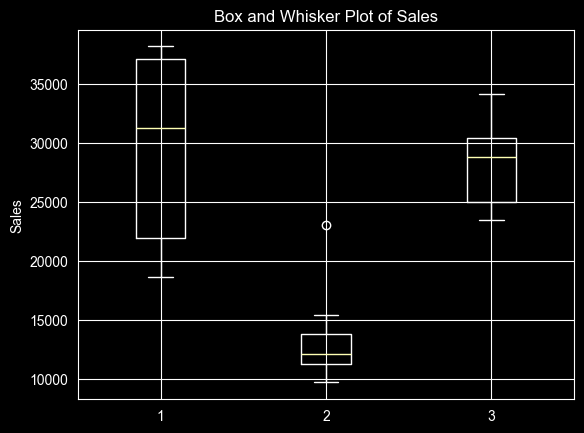

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot([df_APAC['Sales'],df_Europe['Sales'], df_Americas['Sales'] ], )
plt.ylabel('Sales')
plt.title('Box and Whisker Plot of Sales')
plt.show()

In [35]:
labels = df.Region.unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [42]:
plot_data = [df.Sales[df.Region == label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

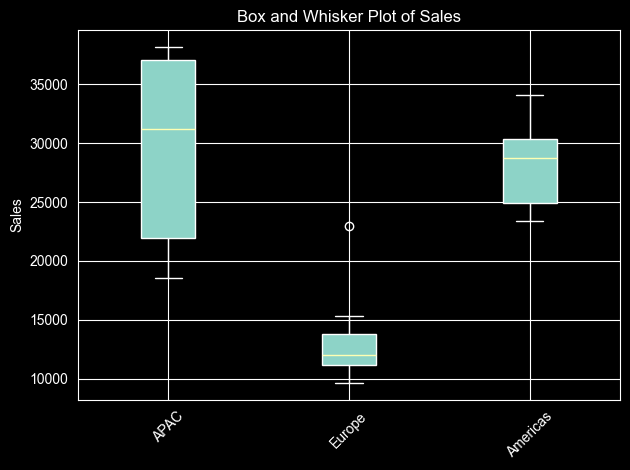

In [50]:
plt.figure()
plt.boxplot(plot_data, tick_labels = labels, vert=True, patch_artist=True)
plt.ylabel('Sales')
plt.title('Box and Whisker Plot of Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()